In [1]:
import pandas as pd
Churn = pd.read_csv("Churn_Modelling.csv")

In [2]:
Churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt #or: from matplotlib import pyplot as plt

<Axes: xlabel='Age', ylabel='CreditScore'>

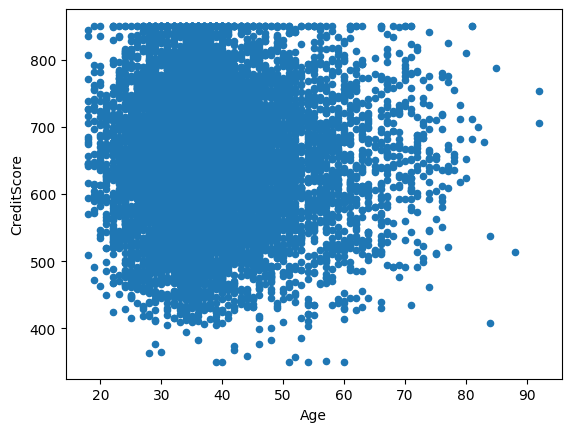

In [5]:
#scatter plot with pandas
Churn.plot.scatter(x="Age", y = "CreditScore")

<Axes: xlabel='Age', ylabel='CreditScore'>

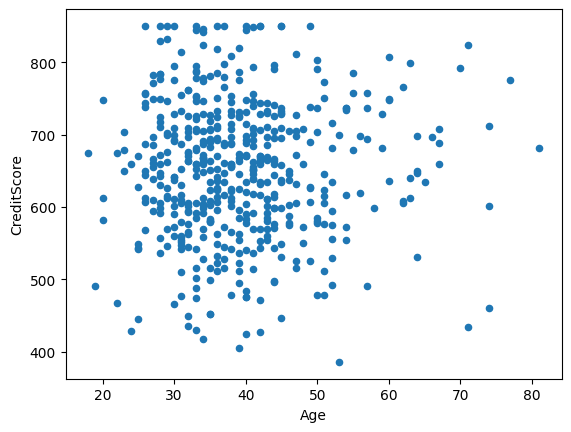

In [6]:
#taking random sample then plot
Churn.sample(500).plot.scatter(x='Age',y='CreditScore')

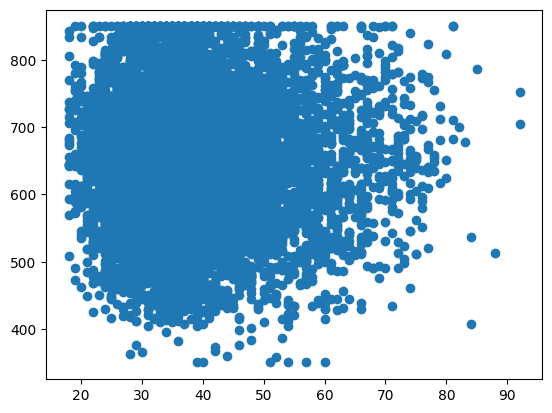

In [7]:
#without pandas here you have to create separate variable to store sample size data and then use plt
plt.scatter(x=Churn['Age'], y = Churn['CreditScore'])

In [8]:
Churn_avg_age = Churn.groupby('Age')[['HasCrCard', 'NumOfProducts', 'Tenure']].mean().reset_index()

In [9]:
Churn_avg_age

Age  HasCrCard  NumOfProducts     Tenure
0    18   0.636364       1.500000   4.818182
1    19   0.814815       1.370370   5.074074
2    20   0.650000       1.550000   5.075000
3    21   0.716981       1.660377   4.773585
4    22   0.690476       1.523810   5.678571
..  ...        ...            ...        ...
65   83   0.000000       1.000000   6.000000
66   84   0.500000       1.000000   8.000000
67   85   1.000000       2.000000  10.000000
68   88   1.000000       2.000000  10.000000
69   92   0.500000       1.500000   2.000000

[70 rows x 4 columns]

<Axes: xlabel='Age'>

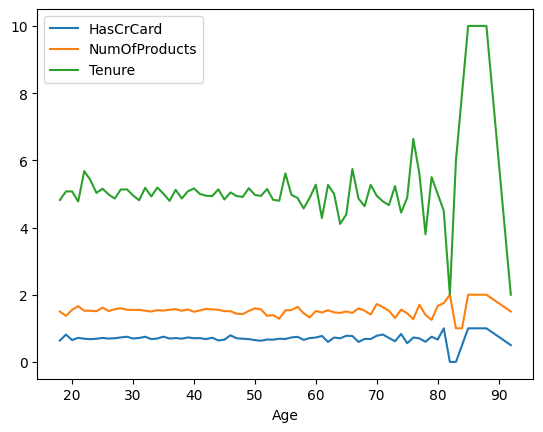

In [10]:
Churn_avg_age.plot.line(x='Age')

Text(0, 0.5, 'cards')

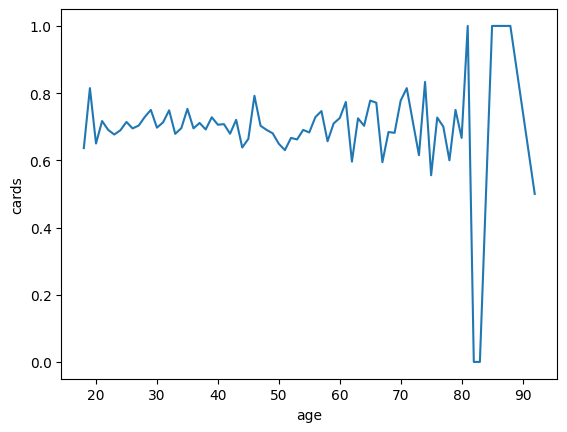

In [11]:
plt.plot(Churn_avg_age["Age"], Churn_avg_age["HasCrCard"])
plt.xlabel("age")
plt.ylabel("cards")

In [12]:
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

<Axes: xlabel='Age', ylabel='HasCrCard'>

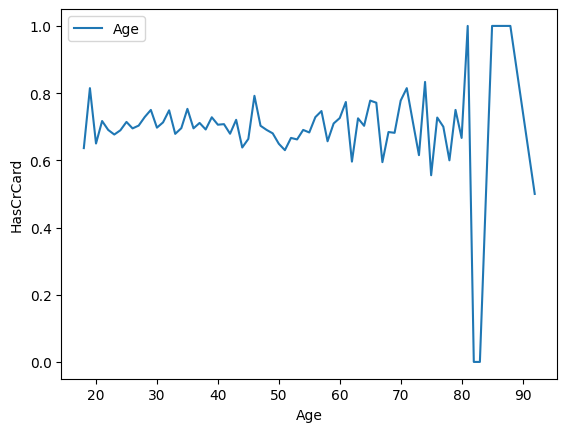

In [13]:
sns.lineplot(data = Churn_avg_age, x = 'Age', y = 'HasCrCard', label = "Age")

In [14]:
Churn_avg_sal = Churn.groupby('Gender')[['EstimatedSalary']].mean().reset_index()
Churn_avg_sal

Gender  EstimatedSalary
0  Female    100601.541382
1    Male     99664.576931

<Axes: xlabel='Gender'>

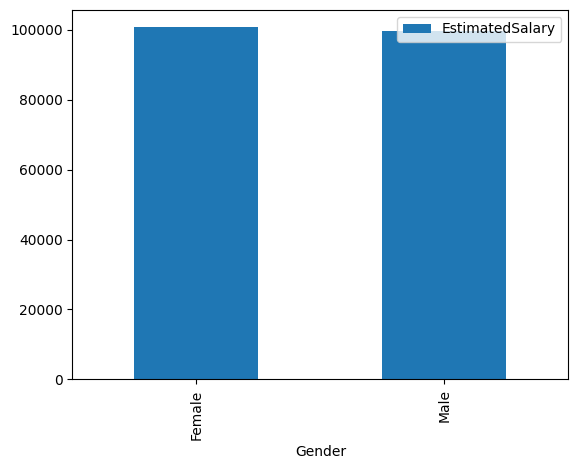

In [15]:
Churn_avg_sal.plot.bar(x = "Gender", y = "EstimatedSalary")

<Axes: ylabel='Gender'>

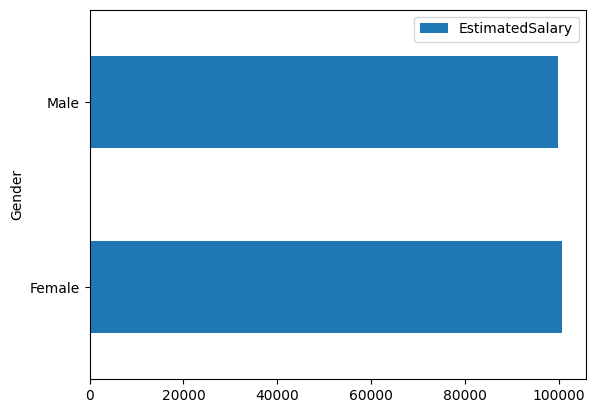

In [16]:
Churn_avg_sal.plot.barh(x = "Gender", y = "EstimatedSalary") # Horizontal bar plot in pandas

<Axes: xlabel='EstimatedSalary', ylabel='Gender'>

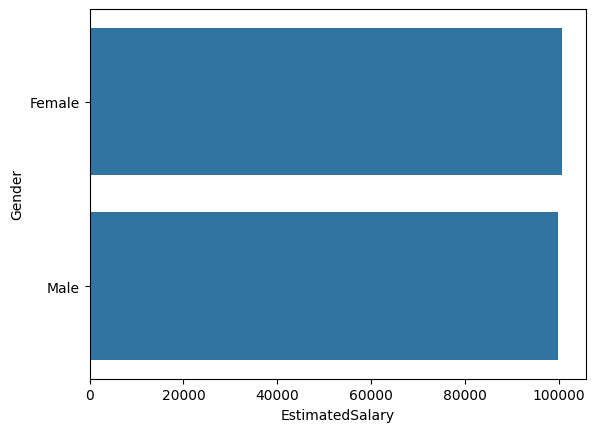

In [17]:
sns.barplot(data = Churn_avg_sal, y = 'Gender', x = 'EstimatedSalary')

In [18]:
Churn['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       5457.])

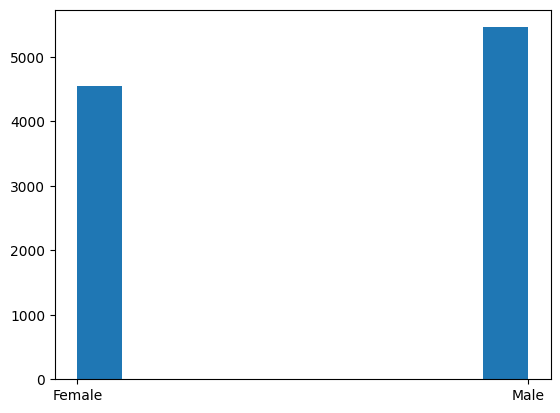

In [19]:
values, bin_edges, patches = plt.hist(Churn['Gender'])
values

In [30]:
# plotting histograms

<Axes: >

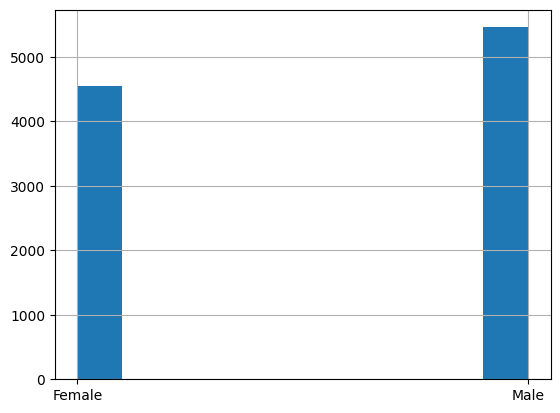

In [32]:
Churn["Gender"].hist() #simple histogram using pandas showing male and female counts

<Axes: >

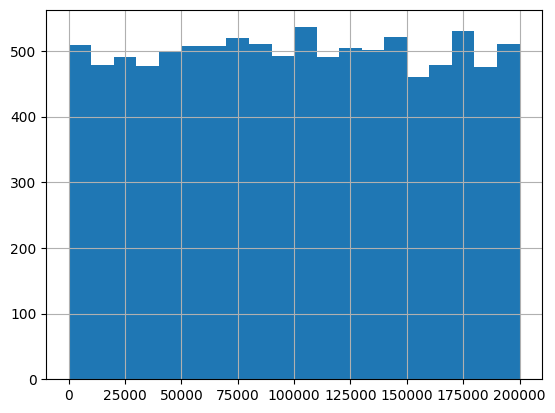

In [35]:
Churn['EstimatedSalary'].hist(bins = 20) #binnig or creating ranges with continious vlaue

(array([509., 478., 491., 477., 498., 508., 507., 520., 510., 492., 536.,
        491., 505., 502., 521., 461., 478., 531., 475., 510.]),
 array([1.15800000e+01, 1.00106250e+04, 2.00096700e+04, 3.00087150e+04,
        4.00077600e+04, 5.00068050e+04, 6.00058500e+04, 7.00048950e+04,
        8.00039400e+04, 9.00029850e+04, 1.00002030e+05, 1.10001075e+05,
        1.20000120e+05, 1.29999165e+05, 1.39998210e+05, 1.49997255e+05,
        1.59996300e+05, 1.69995345e+05, 1.79994390e+05, 1.89993435e+05,
        1.99992480e+05]),
 <BarContainer object of 20 artists>)

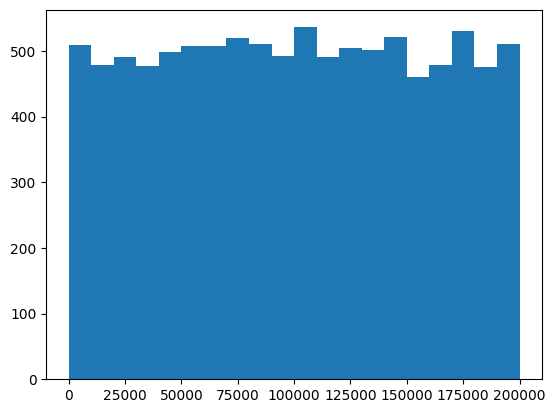

In [36]:
plt.hist(Churn['EstimatedSalary'], bins = 20) #binnig using matplotlib

<Axes: xlabel='CreditScore', ylabel='Count'>

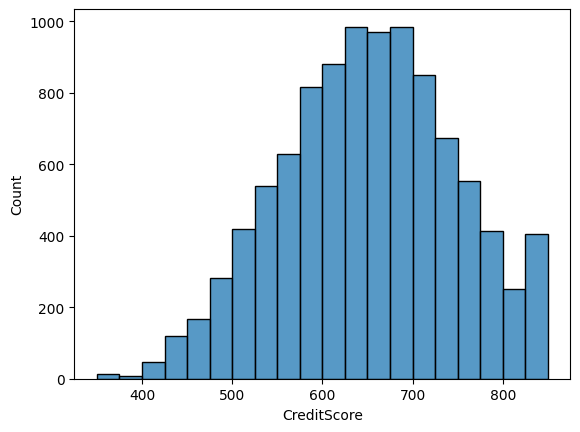

In [39]:
sns.histplot(data = Churn, x = 'CreditScore', bins = 20) # Using seaborn

3D Plotting

In [21]:
Churn["GenderColor"] = Churn["Gender"].apply( lambda x : "green" if x == "Male" else "pink")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

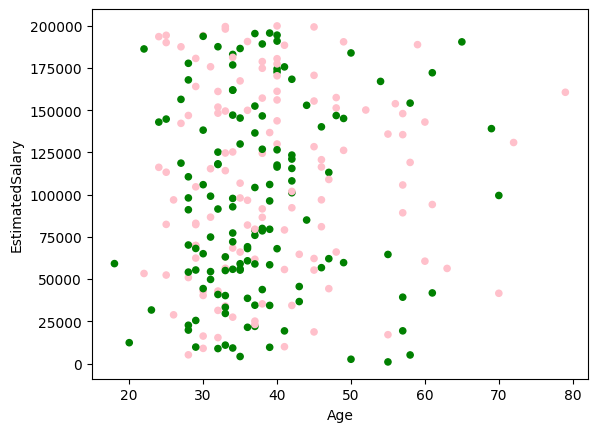

In [42]:
Churn.sample(250).plot.scatter( x = "Age", y = "EstimatedSalary", c = "GenderColor")

In [23]:
# Using matplotlib

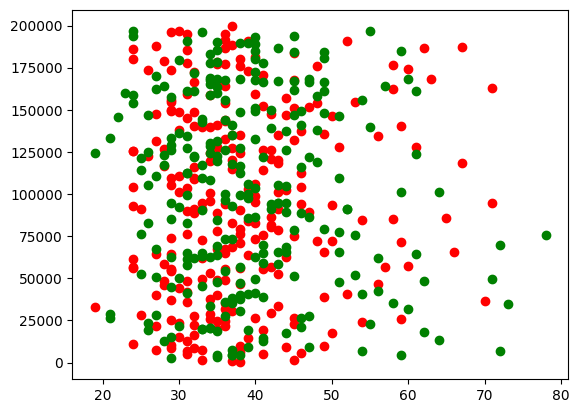

In [46]:
for g in ["Male", "Female"]:
    c = "red" if g == "Male" else "green"
    g_churn = Churn[Churn["Gender"] == g].sample(250)
    plt.scatter(x = g_churn["Age"], y = g_churn["EstimatedSalary"], color = c)

In [48]:
Churn

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited GenderColor  
0           101348.88       1        pink  
1           112542.58       0        pink  
2           113931.57       1        pink  
3            93826.63       0        pink  
4            79084.10       0        pink  
...               ...     ...         ...  
9995         96270.64       0       green  
9996        101699.77       0       green  
9997         42085.58       1        pink  
9998         92888.52       1       green  
9999         38190.78       0        pink  

[10000 rows x 15 columns]

In [47]:
g_churn

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
9289       9290    15676810          Jen          561    France  Female   31   
3702       3703    15698335  Bergamaschi          504    France  Female   73   
2213       2214    15803749       DeRose          498   Germany  Female   41   
9089       9090    15676526      Bentley          608    France  Female   34   
5286       5287    15690540    Gearheart          684     Spain  Female   41   
...         ...         ...          ...          ...       ...     ...  ...   
5177       5178    15588449       Chuang          591     Spain  Female   27   
8710       8711    15683522      Kennedy          678   Germany  Female   37   
2123       2124    15723320     Azubuike          651   Germany  Female   25   
3500       3501    15675675        Slate          850    France  Female   32   
1126       1127    15593973       Wilkie          663     Spain  Female   33   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9289       1   81480.27              2          1               1   
3702       8       0.00              1          1               1   
2213       4   87541.06              2          1               1   
9089       4   88772.87              1          1               1   
5286       1  134177.06              1          0               0   
...      ...        ...            ...        ...             ...   
5177       5  107812.67              1          0               1   
8710       2  113383.07              1          1               1   
2123       2  109175.14              2          1               0   
3500       5  106290.64              1          1               0   
1126       8  122528.18              1          1               0   

      EstimatedSalary  Exited GenderColor  
9289         65234.60       0        pink  
3702         34595.58       0        pink  
2213         12577.21       1        pink  
9089        168822.01       0        pink  
5286        177506.66       0        pink  
...               ...     ...         ...  
5177        162501.83       1        pink  
8710        135123.96       0        pink  
2123        114566.47       0        pink  
3500        121982.73       0        pink  
1126        196260.30       0        pink  

[250 rows x 15 columns]

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

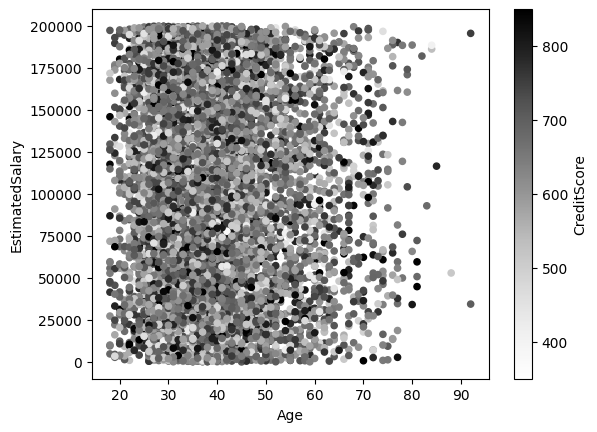

In [25]:
Churn.plot.scatter(x='Age', y = 'EstimatedSalary', c = 'CreditScore') # Passing a continious range to color feature in pandas

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

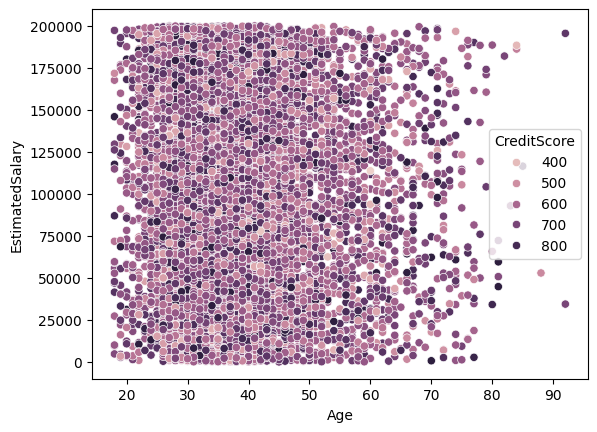

In [26]:
sns.scatterplot(data = Churn, x = 'Age', y = 'EstimatedSalary', hue = 'CreditScore') # Using seaborn

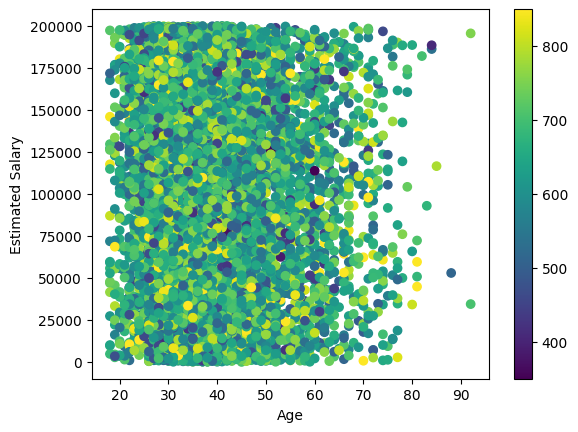

In [27]:
mat_scatterPlot = plt.scatter(x = Churn['Age'], y = Churn['EstimatedSalary'], c = Churn['CreditScore']) # Using matplotlib
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.colorbar(mat_scatterPlot)

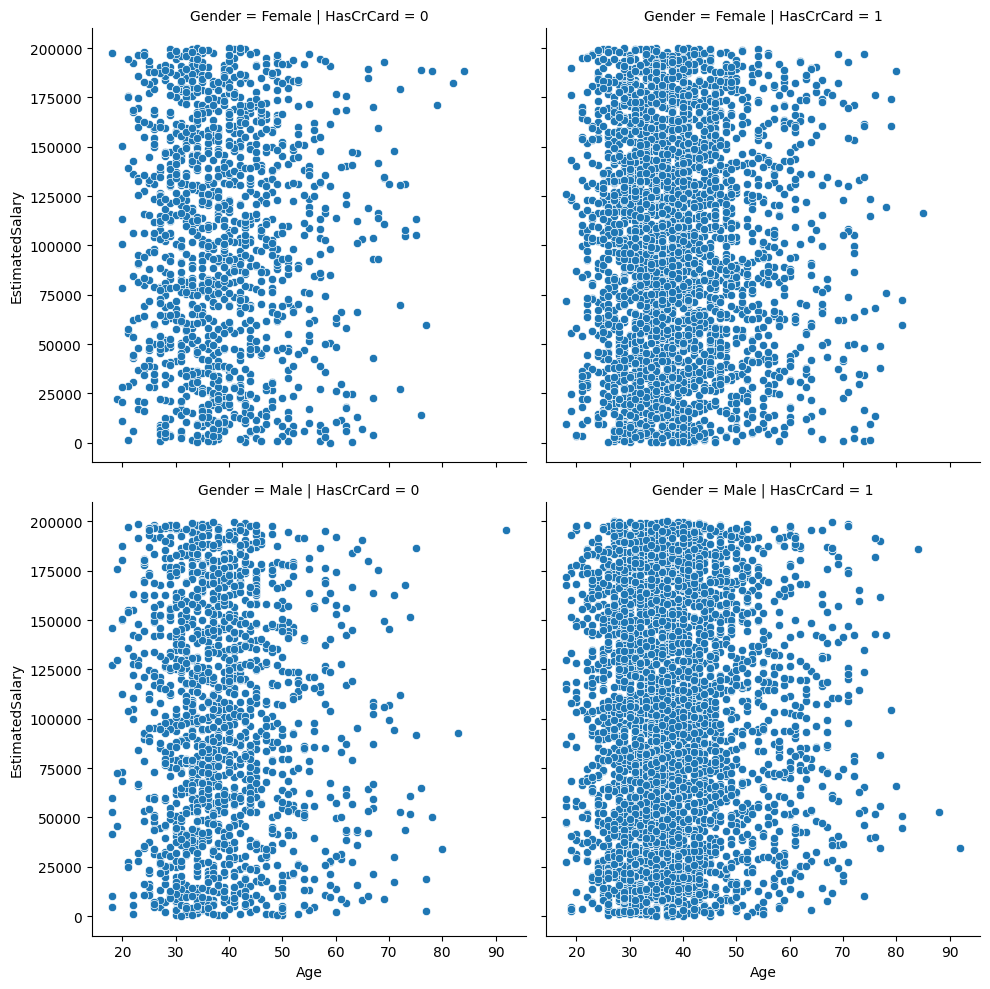

In [28]:
# Starting Multiplots
sns.relplot(data = Churn, x = 'Age', y = 'EstimatedSalary', row = 'Gender', col = 'HasCrCard')

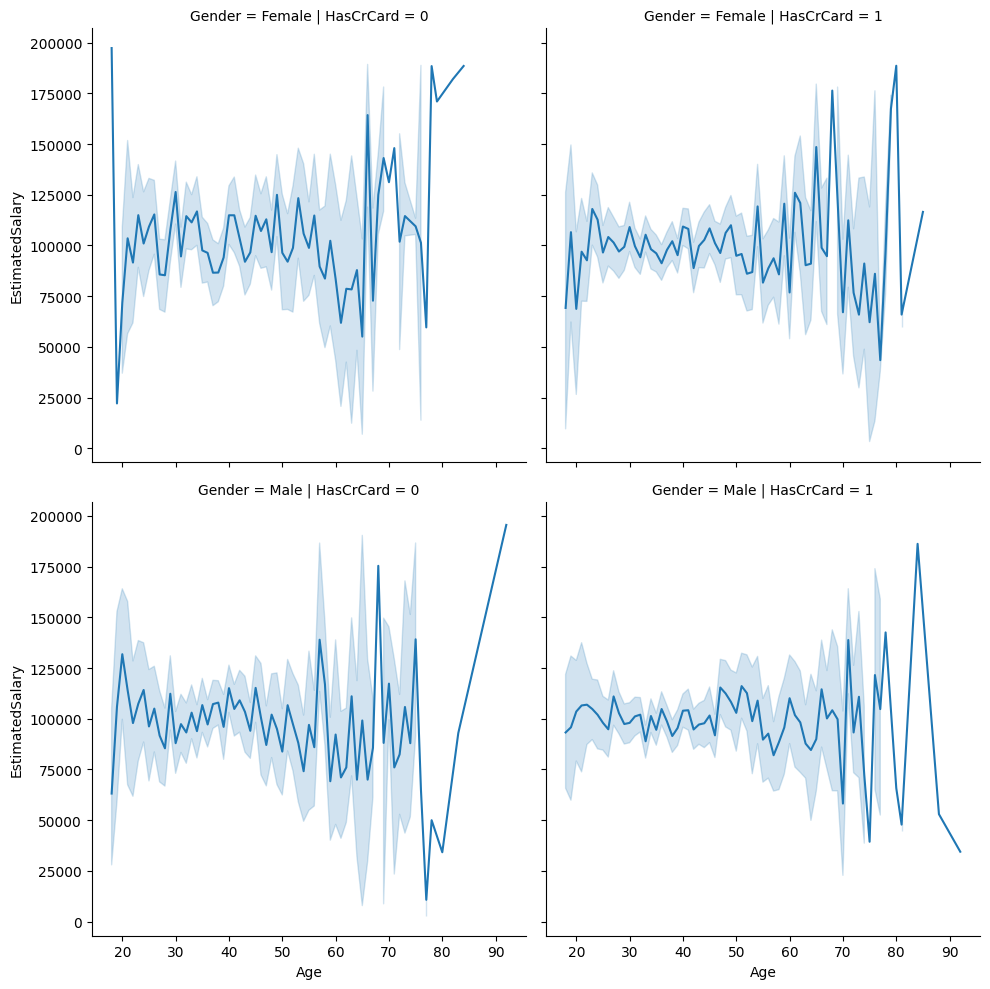

In [50]:
# Using multiplot with line plot
sns.relplot(data = Churn, x = 'Age', y = 'EstimatedSalary', row = 'Gender', col = 'HasCrCard', kind = 'line') 

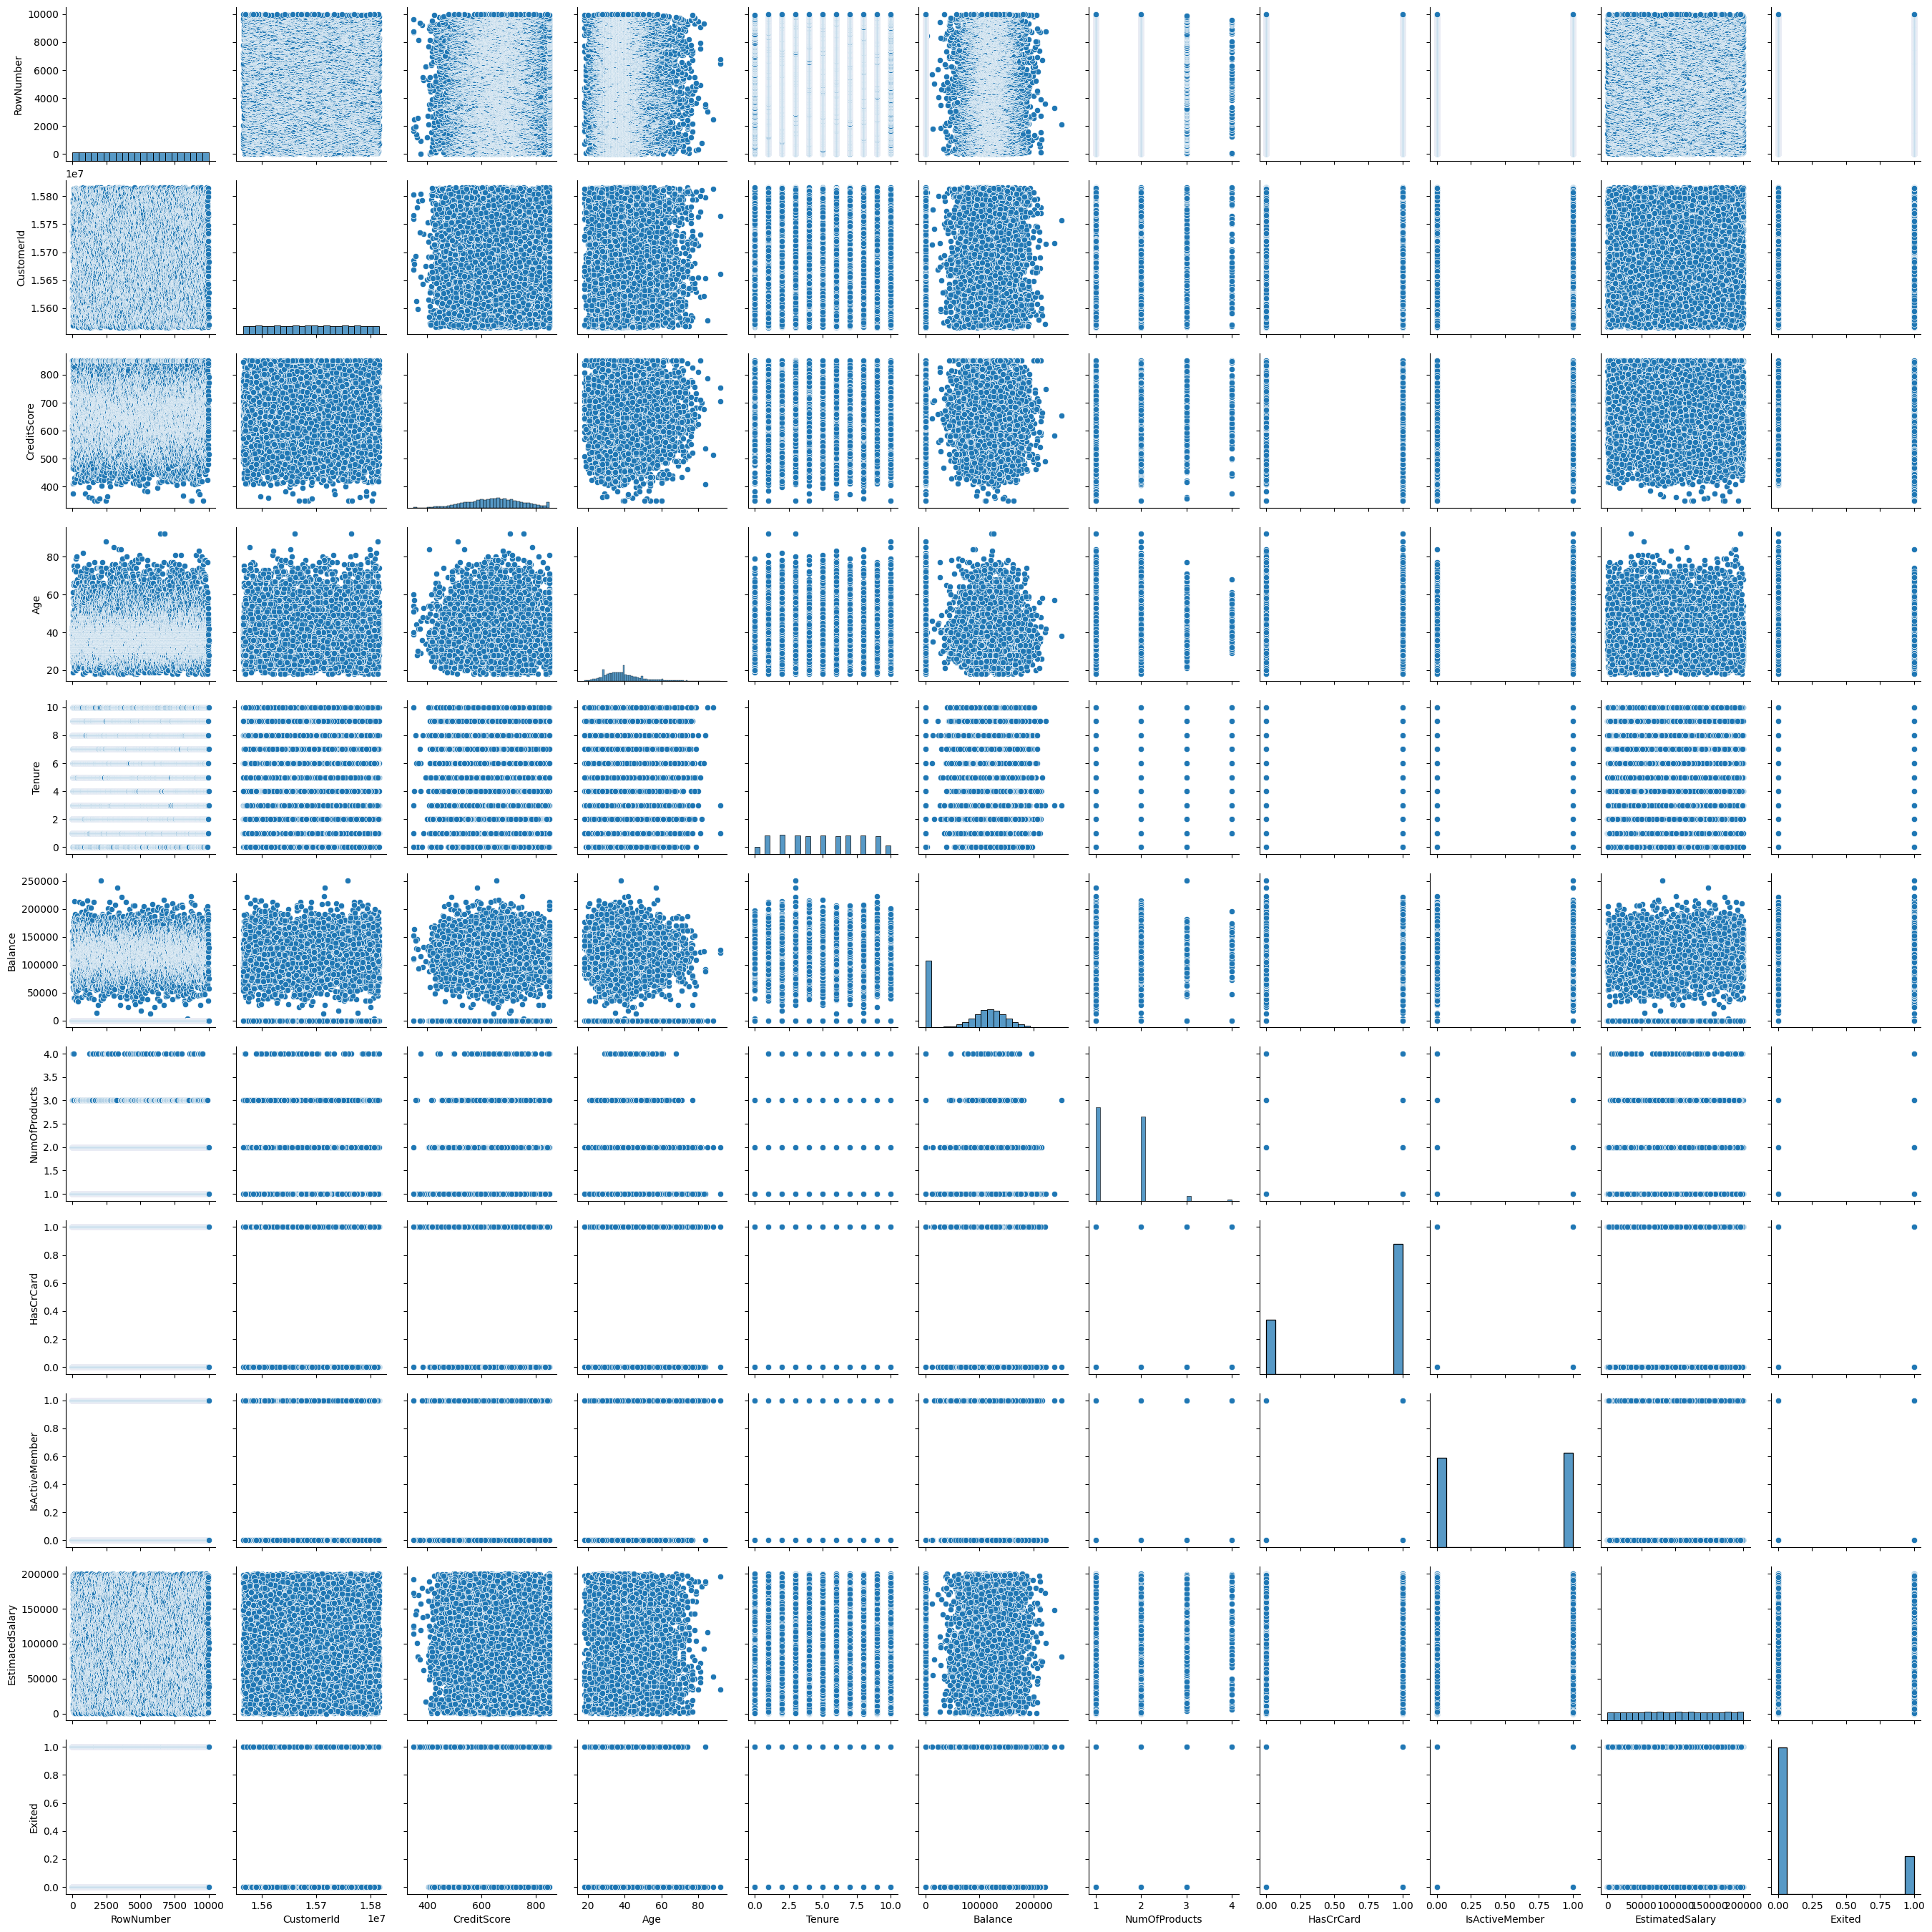

In [51]:
# Using pairplots- Creates a grid of plots with all possible conmbinations od columns in DF, uses scatter plot
sns.pairplot(Churn)